In [1]:
import numpy as np
from scipy.io import loadmat
import h5py
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [2]:
data = loadmat('E338/E338_12691/E338_12691.mat', struct_as_record=False, squeeze_me=True)

In [3]:
ds = data['data_struct']
dir(ds.images.DTOTR2.loc)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [4]:
with h5py.File('E338/E338_12691/images/DTOTR2/DTOTR2_data_step01.h5', 'r') as f:
    # List all groups (top-level keys)
    print("Keys:", list(f.keys()))
    
    # Access a dataset by key
    dataset = f['some_dataset_name']
    
    # Convert to NumPy array if needed
    data = dataset[()]  # or: data = dataset[:]
    
    print(data)

Keys: ['entry']


KeyError: "Unable to synchronously open object (object 'some_dataset_name' doesn't exist)"

In [5]:
# strucutre of DTOTR2_data_step01.h5
def print_h5_structure(name, obj):
    print(name, 'Group' if isinstance(obj, h5py.Group) else 'Dataset', getattr(obj, 'shape', ''))

with h5py.File('E338/E338_12691/images/DTOTR2/DTOTR2_data_step01.h5', 'r') as f:
    f.visititems(print_h5_structure)

entry Group 
entry/data Group 
entry/data/data Dataset (300, 958, 236)
entry/instrument Group 
entry/instrument/NDAttributes Group 
entry/instrument/NDAttributes/BayerPattern Dataset (300,)
entry/instrument/NDAttributes/NDArrayEpicsTSSec Dataset (300,)
entry/instrument/NDAttributes/NDArrayEpicsTSnSec Dataset (300,)
entry/instrument/NDAttributes/NDArrayTimeStamp Dataset (300,)
entry/instrument/NDAttributes/NDArrayUniqueId Dataset (300,)
entry/instrument/detector Group 
entry/instrument/detector/NDAttributes Group 
entry/instrument/detector/NDAttributes/ColorMode Dataset (300,)
entry/instrument/performance Group 
entry/instrument/performance/timestamp Dataset (300, 5)


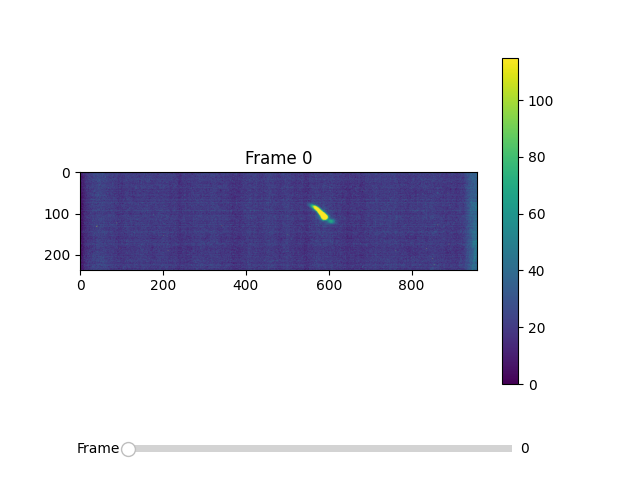

In [6]:
%matplotlib widget

import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Load HDF5 file
f = h5py.File('E338/E338_12691/images/DTOTR2/DTOTR2_data_step01.h5', 'r')
data = f['entry']['data']['data']

def get_frame(i):
    return data[i].transpose()

# Set up figure
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)

im = ax.imshow(get_frame(0), cmap='viridis', vmax=115)
plt.colorbar(im, ax=ax)
title = ax.set_title('Frame 0')

# Slider
from matplotlib.widgets import Slider
ax_slider = plt.axes([0.2, 0.05, 0.6, 0.03])
slider = Slider(ax_slider, 'Frame', 0, data.shape[0] - 1, valinit=0, valstep=1)

def update(val):
    i = int(slider.val)
    im.set_data(get_frame(i))
    title.set_text(f'Frame {i}')
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()